# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.710114e+01     1.366552e+01
 * time: 0.0017840862274169922
     1     3.104352e+01     6.428838e+00
 * time: 0.007501125335693359
     2     2.986063e+01     8.287462e+00
 * time: 0.013993978500366211
     3     2.283405e+01     2.985149e+00
 * time: 0.020292997360229492
     4     2.077714e+01     3.396587e+00
 * time: 0.02597498893737793
     5     1.998358e+01     2.146314e+00
 * time: 0.03154611587524414
     6     1.926315e+01     2.141017e+00
 * time: 0.03603816032409668
     7     1.872307e+01     1.801133e+00
 * time: 0.04066801071166992
     8     1.836314e+01     1.305832e+00
 * time: 0.04541802406311035
     9     1.809183e+01     8.172810e-01
 * time: 0.05023908615112305
    10     1.788812e+01     7.713674e-01
 * time: 0.05517911911010742
    11     1.772294e+01     7.797127e-01
 * time: 0.059954166412353516
    12     1.766913e+01     1.496123e+00
 * time: 0.06375002861022949
    13     1.757109e+01     9.863575e-01
 *

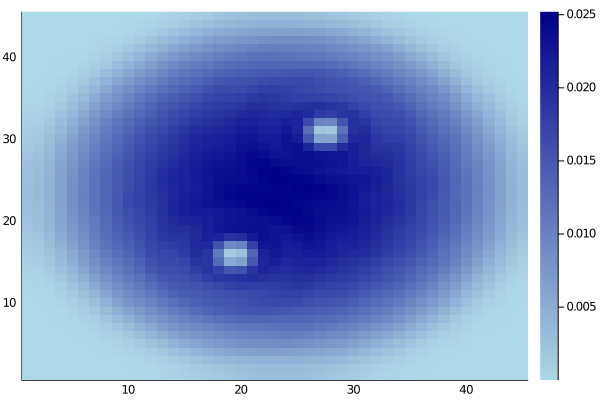

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)